<a href="https://colab.research.google.com/github/Abhinagit24/data_analytics_2/blob/main/Python/Unit_4_ML_KNN_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abhina Premachandran

Data Analytics_Section2

#KNN algorithm

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the   predicted response value for the unknown value.
hOW KNN works?
How we will classify an unknown fruit classifyes as a specific fruit?
We will compare its characteristic with 



# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.
## Machine learning terminology
- Each row is an **observation** (also known as: sample, example, instance, record) we will designate it with  y
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate) we will designate it as an X ,capital X (designating matrix)

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [378]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

read the data set or load it if it is encapsulated in SIlearn 
df = pd.read_csv('https...') or
import load_iris function from datasets module
scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.some of them are:
load_boston()	Load and return the boston house-prices dataset (regression).
load_iris()	Load and return the iris dataset (classification).
load_diabetes()	Load and return the diabetes dataset (regression).

In [379]:
#defining the dataset
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [380]:
#printing the first five values of df
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [381]:
# printing the columns
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [382]:
#droping the column,'Unnamed: 0' because it is unnecesssary for the data analysis
df.drop(['Unnamed: 0'], axis=1, inplace=True)  

In [383]:
#printing the first five values of df to confirm the change made
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [384]:
#type of df
type(df)

pandas.core.frame.DataFrame

In [385]:
#renaming df as ad_data
ad_data = df

In [386]:
#printing the values in ad_data
print (ad_data) 

          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  1.117340  1.348517             1
996  0.575529  0.955786  0.941835  ...  0.958684  1.663489             0
997  1.135470  0.982462  0.781905  ...  0.919191  1.385504             1
998  1.084894  0.861769  0.407158  ...  1.277456  1.188063             1
999  0.837460  0.961184  0.417006  ...  1.257190  1.364837             1

[1000 rows x 11 columns]


In [387]:
#importing StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

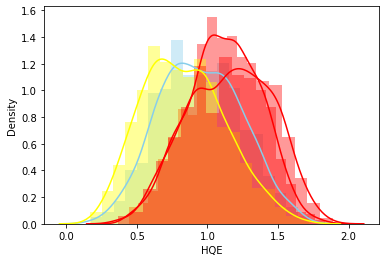

In [388]:
#plotting some columns to show that the data is not standardized
sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")



#Standardization and Normalization of data

In [389]:
#importing StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [390]:
#Defining scalar
scalar = StandardScaler()

In [391]:
#fit() computes the mean and standard deviation used for standardizing

scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [392]:
# performing the standardization in df without the 'TARGET CLASS' column and defining it as scaled_features
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))


In [393]:
#defining scaled_features as a data frame and naming it as df_feature
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [394]:
X = df.drop('TARGET CLASS',axis=1).values


In [395]:
#printing the first five rows of df_feature, shows the standardized and normalized data
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

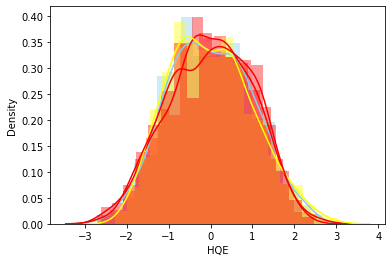

In [396]:
#plotting the standardized data 
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")


## Model Building


Step 1 train and test your model
Import the library

In [397]:
#importing train_test_split for splitting the data
from sklearn.model_selection import train_test_split

In [398]:
#splitting the data for testing and training. scaled_features(df without the 'TARGET CLASS') is used as X and df['TARGET CLASS' is used as y. 30% if the data is used for testing.
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [399]:
#Printing X_train,y_train and y_test
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print ("y_test: ", y_test)

X_train:  [[-0.30890797  1.58891695  0.4021413  ... -0.57969899  0.24754859
  -0.29943373]
 [-0.5573358   0.12343704  2.00278299 ...  0.54697374 -0.17684512
   2.2027549 ]
 [-2.45008213  0.11851294  0.02060363 ... -0.16253698 -2.13223783
  -1.09411642]
 ...
 [ 0.13794139 -0.80847575 -0.91589819 ... -2.23635744 -0.57993863
   0.86629486]
 [-0.42292472  0.23895017 -0.18678697 ...  1.30134411  0.32337549
   0.24341049]
 [ 0.21165318 -0.31249005  0.06516319 ... -2.6042642  -0.13934703
  -0.06960223]]
y_train:  71     0
92     0
241    0
207    0
264    0
      ..
631    0
447    1
583    1
298    0
995    1
Name: TARGET CLASS, Length: 700, dtype: int64
y_test:  759    1
562    1
88     1
374    1
64     1
      ..
998    1
232    0
250    0
335    1
209    1
Name: TARGET CLASS, Length: 300, dtype: int64


Name of the object does not matter
Can specify tuning parameters (aka "hyperparameters") during this step
All parameters not specified are set to their defaults

In [361]:
#importing KNeighborsClassifier for KNN model
from sklearn.neighbors import  KNeighborsClassifier

In [362]:
#Defining knn and passing the value for k as 1
knn = KNeighborsClassifier(n_neighbors=1)

In [363]:
#Fitting the inputs X_train and y_train in knn model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [364]:
#defining predict, it predicts using the X_test values
predict = knn.predict(X_test)

In [365]:
#printing predict
predict 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [366]:
#importing classification_report and confusion_matrix
from sklearn.metrics import  classification_report, confusion_matrix

In [367]:
#printing the confusion_matrix
print(confusion_matrix(y_test,predict))

[[132  18]
 [  9 141]]


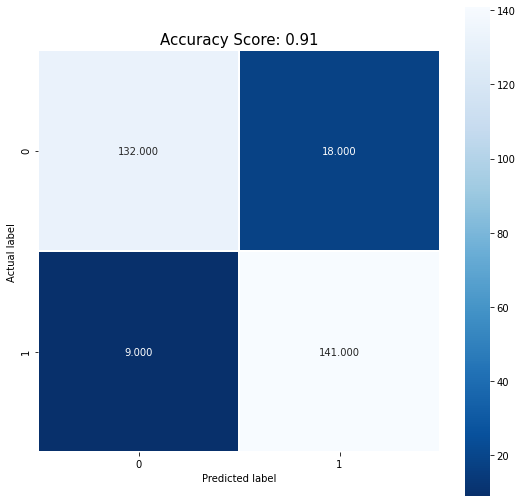

In [368]:
#printing the heatmap of confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [369]:
#printing the classification report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       150
           1       0.89      0.94      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [370]:
#printing the accuracy score for this model
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

[0.91]


# Repeat above steps for K = 5, see what happens with Accuracy

Building another knn model by using a k value of 5

In [400]:
#importing KNeighborsClassifier for KNN model
from sklearn.neighbors import  KNeighborsClassifier

In [401]:
#Defining knn and passing the value for k as 5
knn = KNeighborsClassifier(n_neighbors=5)

In [402]:
#Fitting the inputs X_train and y_train in knn model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [403]:
#defining predict, it predicts using the X_test values
predict = knn.predict(X_test)

In [404]:
#printing predict
predict 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [405]:
#importing classification_report and confusion_matrix
from sklearn.metrics import  classification_report, confusion_matrix

In [406]:
#printing the confusion_matrix
print(confusion_matrix(y_test,predict))

[[132  12]
 [  9 147]]


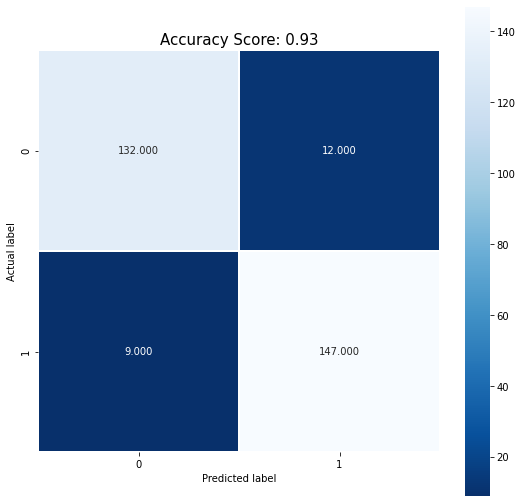

In [407]:
#printing the heatmap of confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [408]:
#printing the classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       144
           1       0.92      0.94      0.93       156

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [409]:
#printing the accuracy score
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

[0.93]


# K Value and Accuracy
Selecting the optimal K value to achieve the maximum accuracy of the model 
Initialize a random K value and start computing.
Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.


In [371]:
#import numpy
import numpy as np

Now it’s time to improve the model and find out the optimal k value.


In [372]:
# importing sklearn.metrics for analyzing the prediction error of the model
from sklearn import metrics

In [373]:
#defining the list score
score =[]

In [374]:
#printing the values of accuracy_score for k values from 1 to 39 in the list score by using for loop
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.91, 0.9233333333333333, 0.9166666666666666, 0.9466666666666667, 0.9366666666666666, 0.9433333333333334, 0.93, 0.94, 0.93, 0.9433333333333334, 0.9366666666666666, 0.9466666666666667, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.9433333333333334, 0.9433333333333334, 0.95, 0.9466666666666667, 0.95, 0.9466666666666667, 0.9433333333333334, 0.9333333333333333, 0.94, 0.94, 0.94, 0.94, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334]


Text(0, 0.5, 'Testing Accuracy')

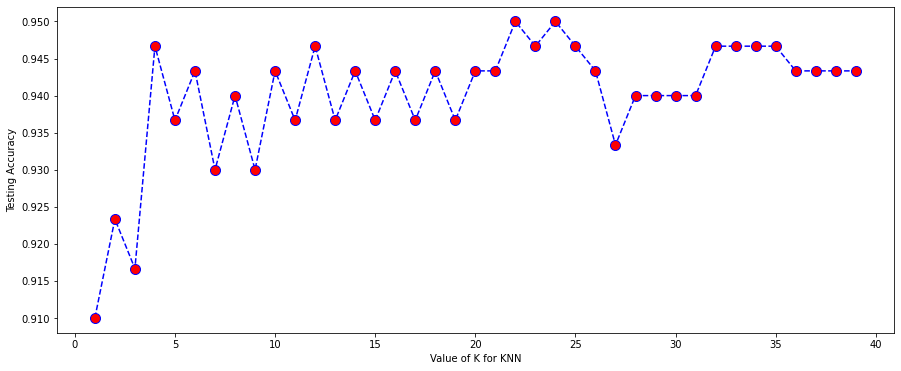

In [375]:
#plotting the accuracy_score for values from 1 to 39
plt.figure(figsize=(15,6))
plt.plot(range(1,40),score, color='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#Error Rate and K value

In [376]:
#Printing the error_rate for k values from 1 to 39
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.05 at K = 21
Maximum error:- 0.09 at K = 0


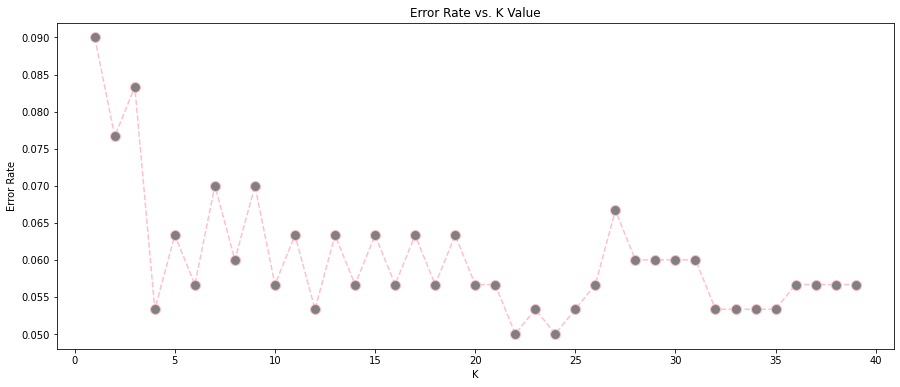

In [377]:
#plotting the error_rate for k values from 1 to 39
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='pink', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print("Maximum error:-",max(error_rate),"at K =",error_rate.index(max(error_rate)))
#print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Conclusion


*   For the Data Frame df, knn classifier model is used to predict the values using two different k values. For the k value of 1, the accuracy_score is 0.91 while for the k value of 5, the accuracy_score is 0.93.

*   For k = 1. the precision and recall values are 0.89 and 0.94 respectively, while for k = 5, the precision and recall values are 0.92 and 0.94  respectively.

*   Inorder to find the best k value to predict by using the knn classifier, the accuracy_score of k values from 1 to 39 is printed and plotted by using for loop. From the plot the high accuracy_score is for 22 and 24.
    The error_rate for k values from 1 to 39 are printed and plotted again using the for loop. From the plot, the minimum error is for k values of 22 and 24.

*   By analyzing the plots for accuracy_score and error_rate, the best k values that can be used are k = 22 and k = 24. 



